In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
rating = pd.read_csv('u.data', sep = '\t', header = None, names = ['user_id', 'movie_id', 'rating', 'timestamp'], encoding = 'utf-8')
user = pd.read_csv('u.user', sep = '|', header = None, names = ['user_id', 'age', 'gender', 'occupation', 'zip_code'], encoding = 'utf-8')
movie = pd.read_csv('u.item', sep = '|', encoding="iso-8859-1", header = None, names = ["movie_id", "movie_title", "release_date", "video_releasedate", "IMDbURL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])

In [3]:
rating.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movie.head()

,movie_id,movie_title,release_date,video_releasedate,IMDbURL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Exploratory Data Analysis

### User Data

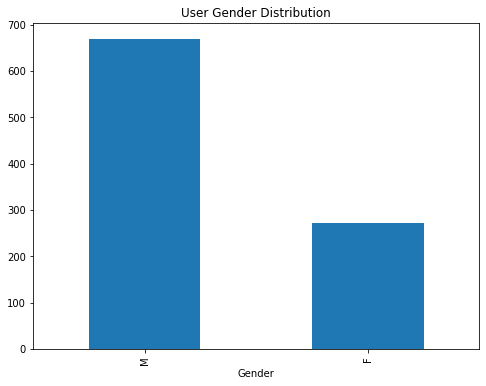

In [6]:
plt.figure(figsize=(8, 6))
user['gender'].value_counts().plot(kind = 'bar')
plt.title('User Gender Distribution', fontsize = 12)
plt.xlabel('Gender')
plt.show()

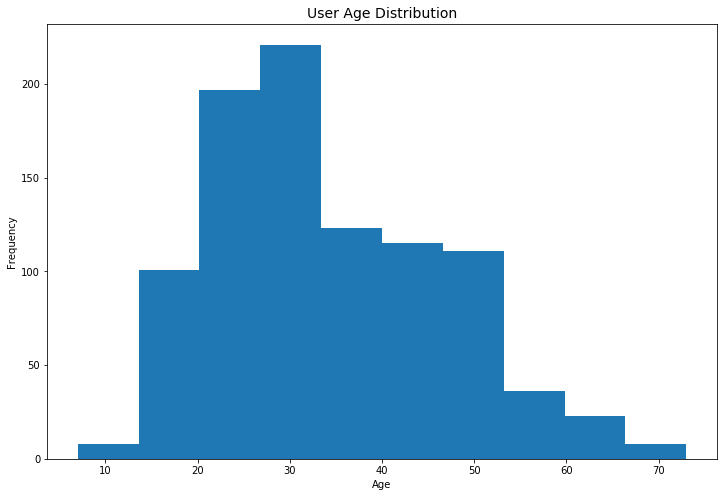

In [7]:
plt.figure(figsize=(12, 8))
user['age'].plot(kind = 'hist')
plt.title('User Age Distribution', fontsize = 14)
plt.xlabel('Age')
plt.show()

In [8]:
data = rating.merge(movie, on = 'movie_id')
data.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_releasedate,IMDbURL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0


### Movie Data

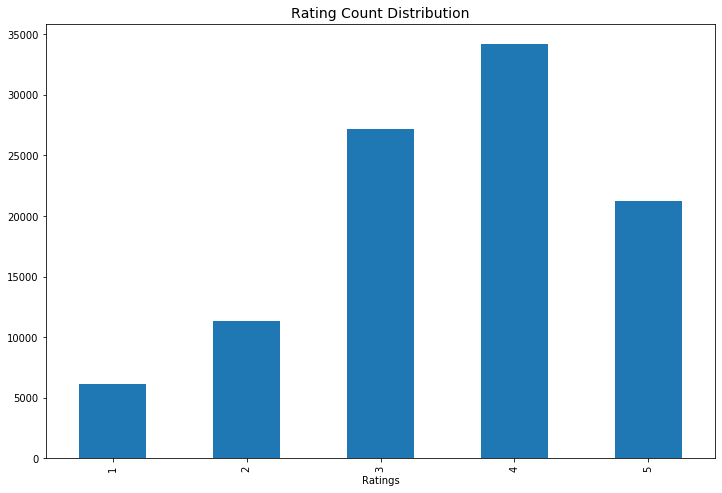

In [9]:
plt.figure(figsize=(12, 8))
ratings_count = data['rating'].value_counts().sort_index()
ratings_count.plot(kind = 'bar')
plt.title('Rating Count Distribution', fontsize = 14)
plt.xlabel('Ratings')
plt.show()

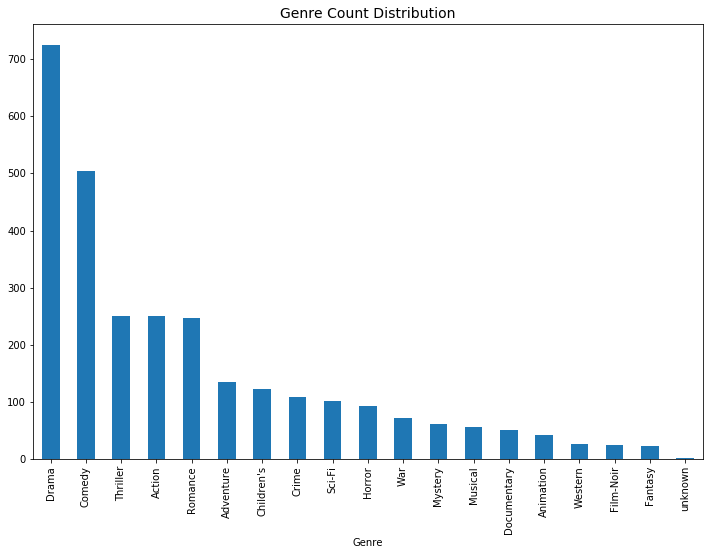

In [10]:
plt.figure(figsize=(12, 8))
genre_count = movie.loc[:, 'unknown':'Western'].sum(axis = 0).sort_values(ascending = False)
genre_count.plot(kind = 'bar')
plt.title('Genre Count Distribution', fontsize = 14)
plt.xlabel('Genre')
plt.show()

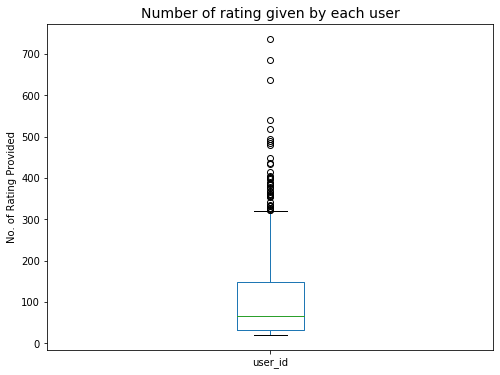

In [11]:
plt.figure(figsize=(8, 6))
genre_count = data['user_id'].value_counts()
genre_count.plot(kind = 'box')
plt.title('Number of rating given by each user', fontsize = 14)
plt.ylabel('No. of Rating Provided')
plt.show()

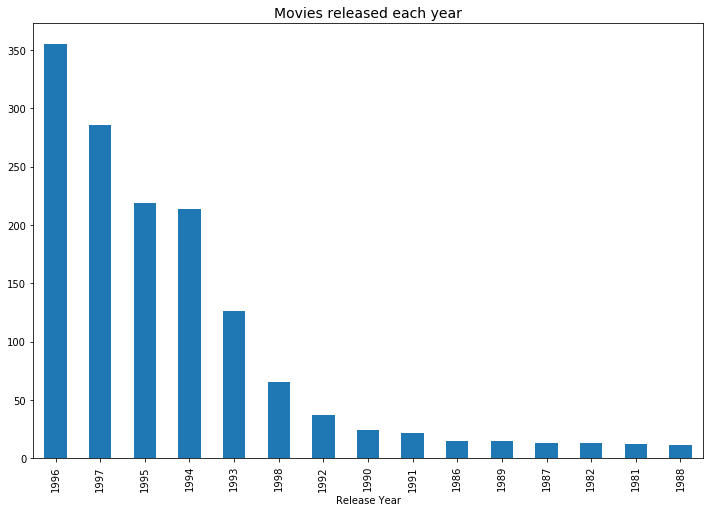

In [12]:
plt.figure(figsize=(12, 8))
year_count = movie['release_date'].str[-4:].value_counts()
year_count = year_count[year_count > 10]
year_count.plot(kind = 'bar')
plt.title('Movies released each year', fontsize = 14)
plt.xlabel('Release Year')
plt.show()

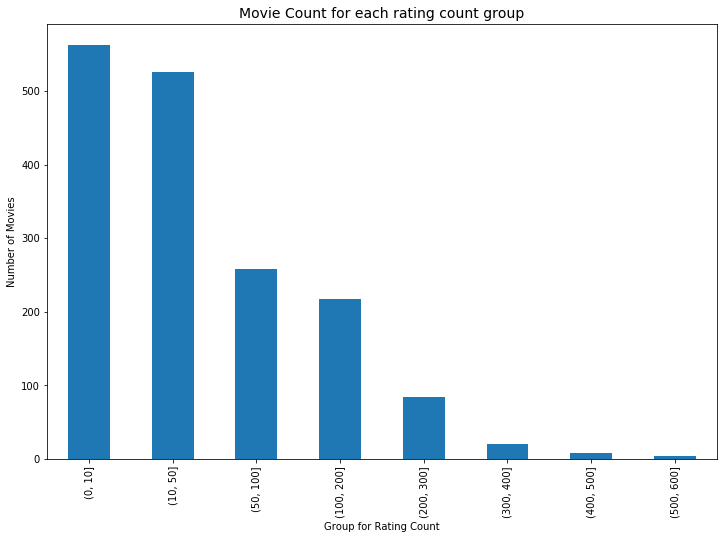

In [13]:
num_ratings = data.groupby('movie_id').agg({'rating':'count'}).reset_index()
num_ratings = num_ratings.rename(columns = {'rating':'num_ratings'})

bins = np.array([0, 10, 50, 100, 200, 300, 400, 500, 600])
num_ratings['bins'] = pd.cut(num_ratings['num_ratings'], bins)

plt.figure(figsize=(12, 8))
num_rating_count = num_ratings['bins'].value_counts()
num_rating_count.plot(kind = 'bar')
plt.title('Movie Count for each rating count group', fontsize = 14)
plt.xlabel('Group for Rating Count')
plt.ylabel('Number of Movies')
plt.show()

### EDA on ratings provided by users

In [14]:
rated_movies_demo = data.merge(user, on = 'user_id')
rated_movies_demo = rated_movies_demo[['user_id', 'movie_id', 'rating', 'age', 'gender', 'occupation']]
rated_movies_demo.head()

,user_id,movie_id,rating,age,gender,occupation
0,196,242,3,49,M,writer
1,196,257,2,49,M,writer
2,196,111,4,49,M,writer
3,196,25,4,49,M,writer
4,196,382,4,49,M,writer


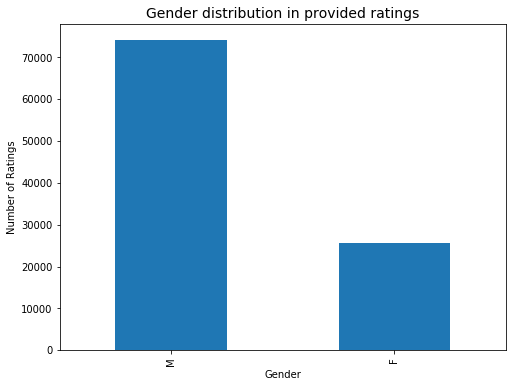

In [17]:
plt.figure(figsize=(8, 6))
rated_movies_demo['gender'].value_counts().plot(kind = 'bar')
plt.title('Gender distribution in provided ratings', fontsize = 14)
plt.xlabel('Gender')
plt.ylabel('Number of Ratings')
plt.show()

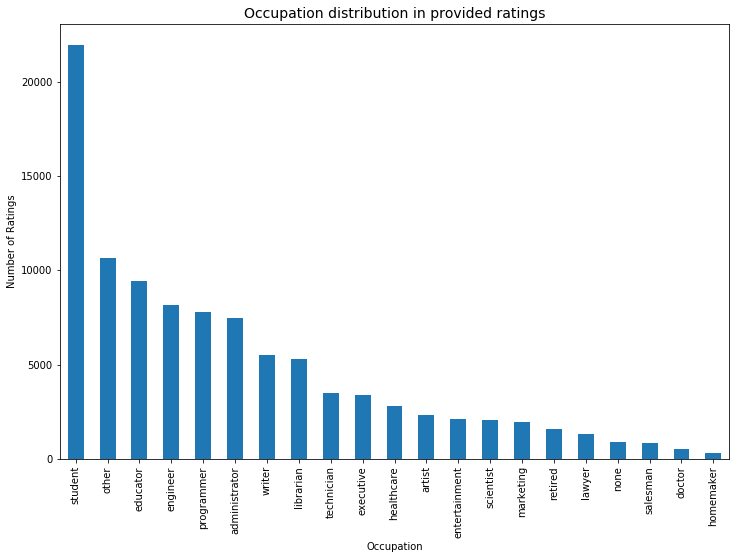

In [18]:
plt.figure(figsize=(12, 8))
rated_movies_demo['occupation'].value_counts().plot(kind = 'bar')
plt.title('Occupation distribution in provided ratings', fontsize = 14)
plt.xlabel('Occupation')
plt.ylabel('Number of Ratings')
plt.show()

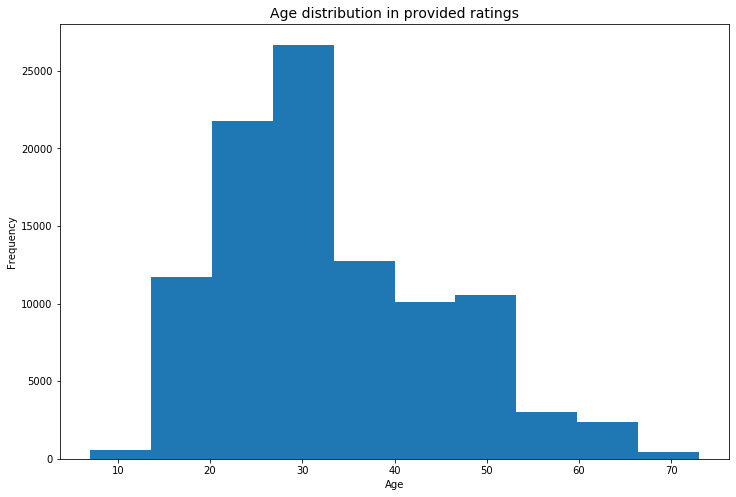

In [19]:
plt.figure(figsize=(12, 8))
rated_movies_demo['age'].plot(kind = 'hist')
plt.title('Age distribution in provided ratings', fontsize = 14)
plt.xlabel('Age')
plt.show()

<Figure size 864x576 with 0 Axes>

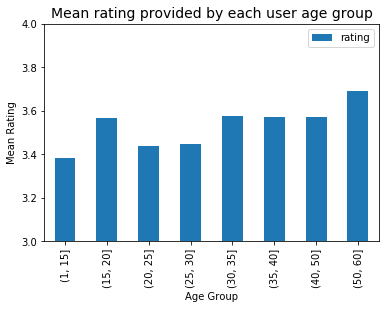

In [20]:
groups = np.array([1, 15, 20, 25, 30, 35, 40, 50, 60])
rated_movies_demo['groups'] = pd.cut(rated_movies_demo['age'], groups)
age_mean_rating = rated_movies_demo.groupby('groups').agg({'rating':'mean'})

plt.figure(figsize=(12, 8))
age_mean_rating.plot(kind = 'bar')
plt.title('Mean rating provided by each user age group', fontsize = 14)
plt.ylim(3.0, 4.0)
plt.xlabel('Age Group')
plt.ylabel('Mean Rating')
plt.show()